# MNIST Digit recognition

This notebook contains my solution to the Kaggle MNIST digit recognition task. I start from a basic linear regression model and advance towards CNN-s through deep NN as a middle step. The notebook titled MNIST digit recognition CNN.ipynb contains further fine-tuning of the CNN model as well as the final submission. 

## Import modules

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
def show_mistakes(y_pred, Y_cv):
    ind = np.array(np.where(y_pred != Y_cv))
    n_mist = ind.size
    ind_rnd = np.random.randint(0, n_mist-1, size=5)

    fig, axes = plt.subplots(1,5, figsize=(20,5))
    for i in range(5):
        axes[i].imshow(np.reshape(np.array(X_cv)[ind[0,i],:], (28,28)), cmap='gray')
        axes[i].set_title("Prediction: {:d}" .format(y_pred[ind[0,i]]))

## Load and visualize image set

In [8]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [9]:
train_data.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
28515,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37567,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13111,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38534,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11826,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train = train_data.drop('label', axis=1)/255
Y_train = train_data['label']
X_test = test_data/255

In [11]:
m_train = Y_train.size
print(m_train)

42000


### Draw five random numbers from the dataset

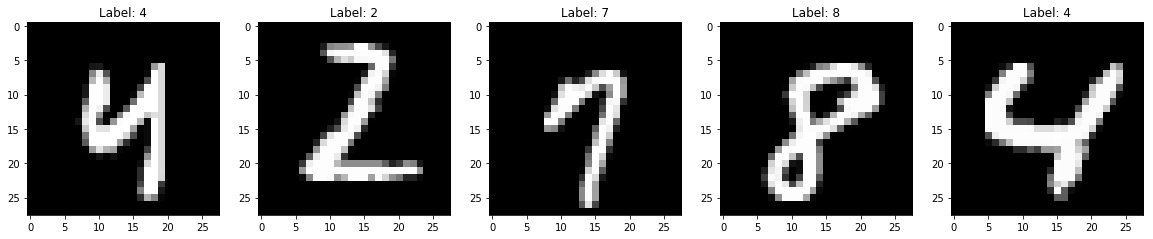

In [12]:
ind = np.random.randint(0, m_train-1, size=(5))

fig, axes = plt.subplots(1,5, figsize=(20,5))
for i in range(5):
    axes[i].imshow(np.reshape(np.array(X_train.iloc[ind[i]]), (28,28)), cmap='gray')
    axes[i].set_title("Label: {:d}" .format(Y_train[ind[i]]))

# Train a minimal model on the dataset without any preprocessing

In [88]:
from sklearn.linear_model import LogisticRegression

X_tr, X_cv, Y_tr, Y_cv = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=1000, verbose=True)
lr.fit(X_tr, Y_tr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=True, warm_start=False)

In [89]:
y_pred = lr.predict(X_cv)
acc = np.sum(y_pred==Y_cv)/Y_cv.size
print("Accuracy = ", acc)

Accuracy =  0.9189285714285714


In [90]:
#Print some random rows and predictions
ind=np.random.randint(0, Y_cv.size-1, (5))
print(np.array(list(zip(np.array(Y_cv)[ind], y_pred[ind]))))

[[1 1]
 [5 5]
 [3 3]
 [7 7]
 [2 4]]


### Show some mistaken digits

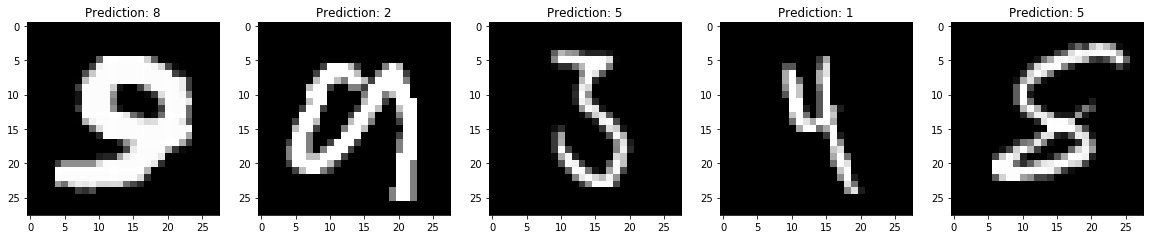

In [91]:
ind = np.array(np.where(y_pred != Y_cv))
n_mist = ind.size
ind_rnd = np.random.randint(0, n_mist-1, size=5)

fig, axes = plt.subplots(1,5, figsize=(20,5))
for i in range(5):
    axes[i].imshow(np.reshape(np.array(X_cv)[ind[0,i],:], (28,28)), cmap='gray')
    axes[i].set_title("Prediction: {:d}" .format(y_pred[ind[0,i]]))

## Make predictions for test set

In [92]:
y_test_pred = lr.predict(X_test)
submission = pd.DataFrame({"ImageId": np.arange(y_test_pred.size)+1, "label": y_test_pred})
submission.set_index("ImageId", inplace=True)
print(submission.head())
submission.to_csv('submission_MNIST_LR.csv')

         label
ImageId       
1            2
2            0
3            9
4            7
5            3


# Train a DeepNN to classify digits

### Import keras modules

In [105]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

In [101]:
nn_model = Sequential()
nn_model.add(Dense(32, input_dim=784, activation="relu"))
nn_model.add(Dense(16, activation="relu"))
nn_model.add(Dense(10, activation="softmax"))

nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [102]:
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [106]:
Y_train_ohe = to_categorical(Y_train, num_classes=10)

In [107]:
nn_model.fit(X_train, Y_train_ohe, validation_split=0.2, epochs=10, batch_size=128, verbose=2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
 - 2s - loss: 0.8148 - acc: 0.7507 - val_loss: 0.3466 - val_acc: 0.9010
Epoch 2/10
 - 1s - loss: 0.3042 - acc: 0.9146 - val_loss: 0.2739 - val_acc: 0.9207
Epoch 3/10
 - 1s - loss: 0.2502 - acc: 0.9284 - val_loss: 0.2346 - val_acc: 0.9320
Epoch 4/10
 - 1s - loss: 0.2158 - acc: 0.9379 - val_loss: 0.2067 - val_acc: 0.9405
Epoch 5/10
 - 1s - loss: 0.1908 - acc: 0.9445 - val_loss: 0.1917 - val_acc: 0.9443
Epoch 6/10
 - 1s - loss: 0.1681 - acc: 0.9504 - val_loss: 0.1762 - val_acc: 0.9483
Epoch 7/10
 - 1s - loss: 0.1517 - acc: 0.9557 - val_loss: 0.1665 - val_acc: 0.9493
Epoch 8/10
 - 1s - loss: 0.1381 - acc: 0.9590 - val_loss: 0.1595 - val_acc: 0.9540
Epoch 9/10
 - 1s - loss: 0.1279 - acc: 0.9628 - val_loss: 0.1539 - val_acc: 0.9560
Epoch 10/10
 - 1s - loss: 0.1177 - acc: 0.9655 - val_loss: 0.1475 - val_acc: 0.9558


In [113]:
y_pred = np.argmax(nn_model.predict(X_cv), axis=1)
acc = np.sum(y_pred==Y_cv)/Y_cv.size
print("Accuracy = ", acc)

Accuracy =  0.9680952380952381


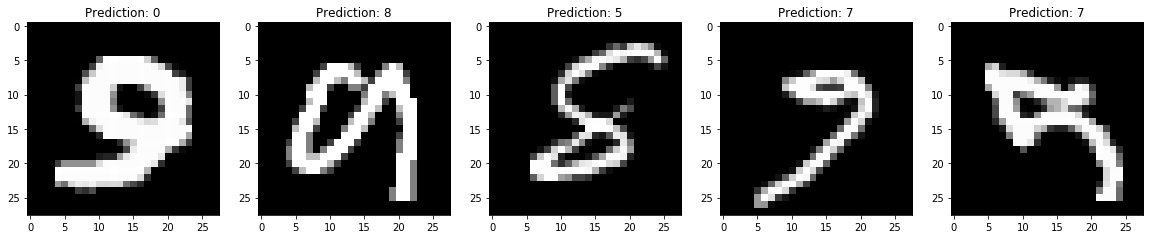

In [115]:
show_mistakes(y_pred, Y_cv)

## Make predictions for the test set

In [111]:
y_test_pred_ohe = nn_model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_ohe, axis=1)
submission = pd.DataFrame({"ImageId": np.arange(y_test_pred.size)+1, "label": y_test_pred})
submission.set_index("ImageId", inplace=True)
print(submission.head())
submission.to_csv('submission_MNIST_NN.csv')

         label
ImageId       
1            2
2            0
3            9
4            9
5            3


# Train a CNN to classify digits

## Resahpe train and test sets to 2d image formats (28,28)

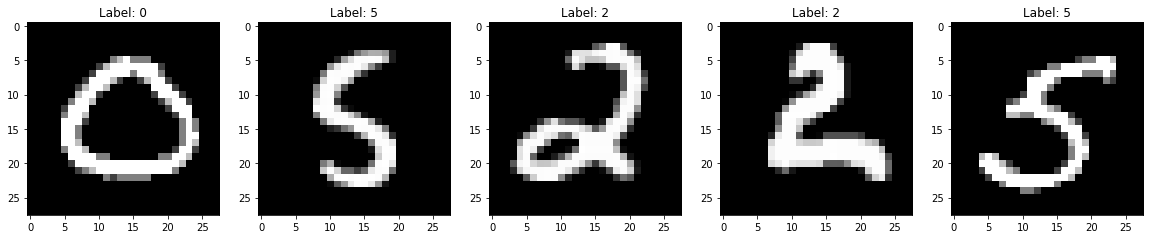

In [137]:
m_train = X_train.shape[0]
m_test = X_test.shape[0]
X_train_img = np.array(X_train).reshape((m_train,28,28,1))
X_test_img = np.array(X_test).reshape((m_test,28,28,1))

# Visualize some random images from the training set
ind = np.random.randint(0, m_train-1, size=(5))
fig, axes = plt.subplots(1,5, figsize=(20,5))
for i in range(5):
    axes[i].imshow(X_train_img[ind[i],:,:,0], cmap='gray')
    axes[i].set_title("Label: {:d}" .format(Y_train[ind[i]]))


## Build CNN model

In [127]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [126]:
Y_train_ohe = to_categorical(Y_train, num_classes=10)

In [131]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
__________

In [132]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [138]:
cnn_model.fit(X_train_img, Y_train_ohe, validation_split=0.2, epochs=10, batch_size=128, verbose=2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
 - 360s - loss: 0.2353 - acc: 0.9268 - val_loss: 0.0690 - val_acc: 0.9793
Epoch 2/10
 - 328s - loss: 0.0601 - acc: 0.9815 - val_loss: 0.0665 - val_acc: 0.9805
Epoch 3/10
 - 329s - loss: 0.0403 - acc: 0.9870 - val_loss: 0.0453 - val_acc: 0.9856
Epoch 4/10
 - 329s - loss: 0.0288 - acc: 0.9901 - val_loss: 0.0521 - val_acc: 0.9840
Epoch 5/10
 - 327s - loss: 0.0193 - acc: 0.9938 - val_loss: 0.0473 - val_acc: 0.9888
Epoch 6/10
 - 327s - loss: 0.0169 - acc: 0.9943 - val_loss: 0.0467 - val_acc: 0.9882
Epoch 7/10
 - 340s - loss: 0.0121 - acc: 0.9963 - val_loss: 0.0566 - val_acc: 0.9844
Epoch 8/10
 - 388s - loss: 0.0068 - acc: 0.9976 - val_loss: 0.0461 - val_acc: 0.9895
Epoch 9/10
 - 334s - loss: 0.0091 - acc: 0.9967 - val_loss: 0.0524 - val_acc: 0.9879
Epoch 10/10
 - 413s - loss: 0.0133 - acc: 0.9957 - val_loss: 0.0580 - val_acc: 0.9844


In [2]:
plt.plot(cnn_model.history.history["acc"])
plt.plot(cnn_model.history.history["val_acc"])
plt.show()

NameError: name 'plt' is not defined

In [140]:
y_test_pred_ohe = cnn_model.predict(X_test_img)
y_test_pred = np.argmax(y_test_pred_ohe, axis=1)
submission = pd.DataFrame({"ImageId": np.arange(y_test_pred.size)+1, "label": y_test_pred})
submission.set_index("ImageId", inplace=True)
print(submission.head())
submission.to_csv('submission_MNIST_CNN.csv')

         label
ImageId       
1            2
2            0
3            9
4            9
5            3


Accuracy =  0.9921428571428571


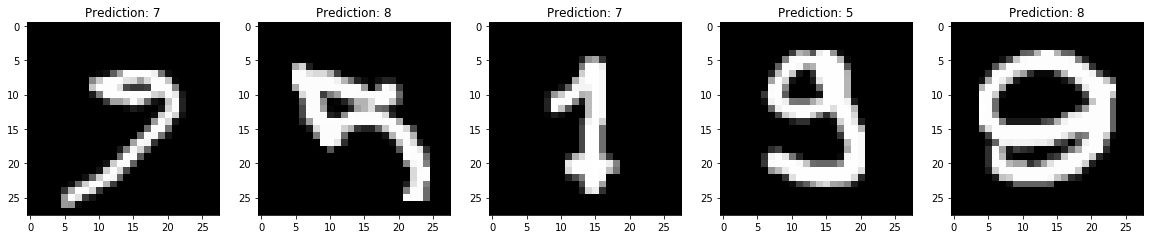

In [142]:
y_pred = np.argmax(cnn_model.predict(np.array(X_cv).reshape((X_cv.shape[0],28,28,1))), axis=1)
acc = np.sum(y_pred==Y_cv)/Y_cv.size
print("Accuracy = ", acc)

show_mistakes(y_pred, Y_cv)

# Test another model architecture